In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('dataset/HousingData.csv')

house_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
house_data = house_data.drop(['B', 'LSTAT'], axis=1)
house_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,18.9


In [4]:
house_data.shape

(506, 12)

In [5]:
col_names = ['CrimeRate', 'ZonedRatio', 'IndusRatio', 
            'AlongRiver', 'N02Level', 'RoomsPerHouse',
            'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex',
            'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']

In [6]:
house_data.columns = col_names

house_data.sample(5)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,N02Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8,284,19.7,16.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,23.9
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8,307,17.4,50.0
241,NaN,30.0,4.93,0.0,0.428,6.095,65.1,6.3361,6,300,16.6,20.1
137,0.35233,0.0,21.89,0.0,0.624,6.454,98.4,1.8498,4,437,21.2,17.1


In [7]:
house_data = house_data.replace('NA', np.nan)

In [8]:
house_data.isnull().sum().sort_values(ascending=False)

OldHomeRatio         20
AlongRiver           20
IndusRatio           20
ZonedRatio           20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTaxRate           0
RoadAccessIndex       0
DisFromCenter         0
RoomsPerHouse         0
N02Level              0
dtype: int64

In [9]:
data = house_data.fillna(house_data.mean())

In [10]:
data.isnull().sum()

CrimeRate            0
ZonedRatio           0
IndusRatio           0
AlongRiver           0
N02Level             0
RoomsPerHouse        0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

In [11]:
data.shape

(506, 12)

In [12]:
target = data['MedianHomeValue']

features = data.drop('MedianHomeValue', axis=1)

In [13]:
features.shape, target.shape

((506, 11), (506,))

In [14]:
from yellowbrick.target import FeatureCorrelation

feature_names = list(features.columns)

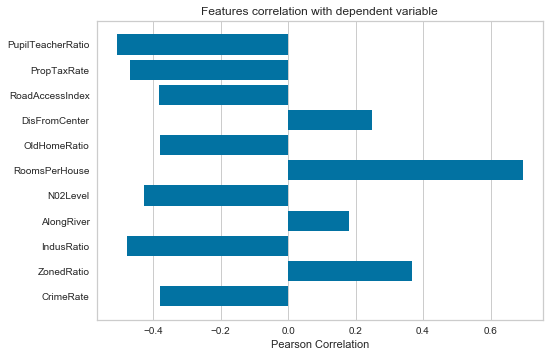

In [15]:
visualizer = FeatureCorrelation(labels=feature_names)

visualizer.fit(features, target)

visualizer.poof()

In [16]:
# Feature Selection using univariate analysis
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

In [17]:
select_univariate = SelectKBest(f_regression, k=5).fit(features, target)

In [18]:
feature_mask = select_univariate.get_support()

feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [19]:
features.columns[feature_mask]

Index(['IndusRatio', 'N02Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [20]:
#F-value
select_univariate.scores_

array([ 84.90107412,  77.9285999 , 149.79218706,  16.85363275,
       112.59148028, 471.84673988,  85.17727935,  33.57957033,
        85.91427767, 141.76135658, 175.10554288])

In [21]:
pd.DataFrame({'FeatureName' : features.columns,
             'Score' : select_univariate.scores_}).sort_values(by='Score',
                                                              ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRatio,149.792187
9,PropTaxRate,141.761357
4,N02Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomeRatio,85.177279
0,CrimeRate,84.901074
1,ZonedRatio,77.928600
7,DisFromCenter,33.579570


In [22]:
uni_df = pd.DataFrame({'Univariate Method' : features.columns[feature_mask]})

uni_df

,Univariate Method
0,IndusRatio
1,N02Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


In [23]:
# Wrapper Methods - RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()

In [24]:
rfe = RFE(estimator = linear_regression,
         n_features_to_select = 5,
         step = 1)

In [25]:
rfe.fit(features, target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [26]:
rfe_features = features.columns[rfe.support_]

rfe_features

Index(['AlongRiver', 'N02Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

In [42]:
pd.DataFrame({'FeatureName' : features.columns,
             'Rank' : rfe.ranking_}).sort_values(by='Rank')

In [48]:
rfe_df = pd.DataFrame({'RFE Method' : rfe_features})
rfe_df

,RFE Method
0,AlongRiver
1,N02Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [28]:
#Forward and Backward selection of features

In [49]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [51]:
# Forward Method
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward=False,
                                            scoring='neg_mean_squared_error',
                                            cv=4)

In [52]:
feature_filtered = feature_selector.fit(features, target)

In [53]:
backward_features = list(feature_filtered.k_feature_names_)
backward_features

['ZonedRatio',
 'N02Level',
 'RoomsPerHouse',
 'DisFromCenter',
 'PupilTeacherRatio']

In [54]:
back_df = pd.DataFrame({'Backward Method' : backward_features})

back_df

,Backward Method
0,ZonedRatio
1,N02Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [55]:
# Backward Method
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward=True,
                                            scoring='neg_mean_squared_error',
                                            cv=4)

In [56]:
feature_filtered = feature_selector.fit(features, target)

In [58]:
forward_features = list(feature_filtered.k_feature_names_)
forward_features

['ZonedRatio',
 'IndusRatio',
 'RoomsPerHouse',
 'OldHomeRatio',
 'PupilTeacherRatio']

In [59]:
forw_df = pd.DataFrame({'Forward Method' : forward_features})

forw_df

,Forward Method
0,ZonedRatio
1,IndusRatio
2,RoomsPerHouse
3,OldHomeRatio
4,PupilTeacherRatio


In [32]:
# Embedded Methods
from sklearn.linear_model import Lasso

In [34]:
lasso = Lasso(alpha=1.0)

lasso.fit(features, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
lasso_coef = pd.DataFrame({'Feature' : features.columns,
                          'LassoCoef' : lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                 ascending=False)

lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZonedRatio,0.042629
3,AlongRiver,0.000000
4,N02Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomeRatio,-0.046299
2,IndusRatio,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [37]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])

lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRatio,0.087830
6,OldHomeRatio,0.046299
1,ZonedRatio,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [39]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)

lasso_df = pd.DataFrame({'Lasso Method' : lasso_df['Feature'].values})

lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [62]:
comp_selected_col_df = [uni_df,
                       rfe_df,
                        back_df,
                        forw_df,
                       lasso_df]

final_df = pd.concat(comp_selected_col_df, axis=1)

In [63]:
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,IndusRatio,AlongRiver,ZonedRatio,ZonedRatio,RoomsPerHouse
1,N02Level,N02Level,N02Level,IndusRatio,PupilTeacherRatio
2,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,DisFromCenter
3,PropTaxRate,DisFromCenter,DisFromCenter,OldHomeRatio,RoadAccessIndex
4,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,CrimeRate


In [64]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score, mean_squared_error

In [65]:
result = []

def best_score(name, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                       y,
                                                       test_size=0.2)
    
    linear_model = LinearRegression(normalize = True).fit(X_train, y_train)
    print(name)
    print('Training Score: ', linear_model.score(X_train, y_train))
    
    y_pred = linear_model.predict(X_test)
    print('r2_score:', r2_score(y_test, y_pred))

In [66]:
best_score('Univariate',
          features[final_df['Univariate Method'].values],
          target)

Univariate
Training Score:  0.6101641845887416
r2_score: 0.5823498405722976


In [67]:
best_score('Recursive',
          features[final_df['RFE Method'].values],
          target)

Recursive
Training Score:  0.6533630310494951
r2_score: 0.5452056026362744


In [68]:
best_score('Backward',
          features[final_df['Backward Method'].values],
          target)

Backward
Training Score:  0.6438494878561625
r2_score: 0.5441025542609602


In [69]:
best_score('Forward',
          features[final_df['Forward Method'].values],
          target)

Forward
Training Score:  0.5966587773093196
r2_score: 0.5892464112532357


In [70]:
best_score('Lasso',
          features[final_df['Lasso Method'].values],
          target)

Lasso
Training Score:  0.6055970818635834
r2_score: 0.5539969238315592
